In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Aman Nema/Downloads/archive (1)/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.shape

(344, 7)

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.dropna(how="any", inplace=True)

In [7]:
df.shape

(334, 7)

In [8]:
df.dropna(subset=['sex'], inplace=True)

In [9]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [11]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


<AxesSubplot:ylabel='species'>

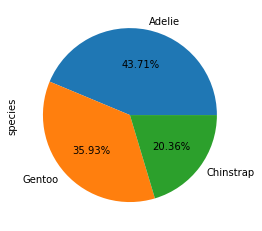

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df["species"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [13]:
df["island"].value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [14]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [15]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [16]:
df.at[336, "sex"] = "FEMALE"

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

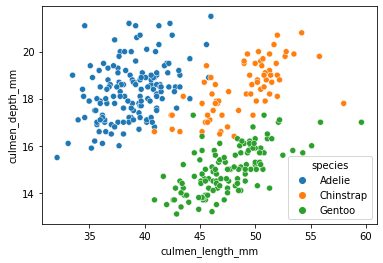

In [17]:
sns.scatterplot(data=df, x="culmen_length_mm", y="culmen_depth_mm", hue="species")

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

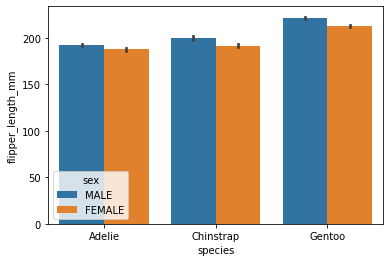

In [18]:
sns.barplot(data=df, x="species", y="flipper_length_mm", hue="sex")

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

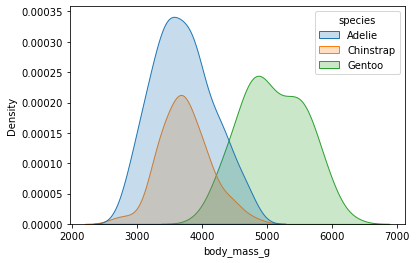

In [19]:
sns.kdeplot(data=df, x="body_mass_g", hue="species", fill=True)

In [20]:
df["sex"] = df["sex"].map({
    "MALE": 0, "FEMALE": 1
})

In [21]:
dummy_island = pd.get_dummies(df["island"], dtype="int64")
dummy_island.head()

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


In [22]:
df = pd.concat([df, dummy_island], axis=1)
df.drop("island", axis=1, inplace=True)
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,0,0,1


In [23]:
X = df.drop("species", axis=1)
y = df["species"]

In [24]:
X.shape, y.shape

((334, 8), (334,))

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X.iloc[:, :4])
X.iloc[:, :4] = sc.transform(X.iloc[:, :4])

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2)

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)

<AxesSubplot:>

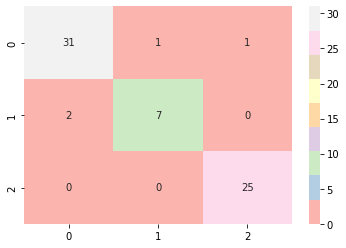

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Pastel1")

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) 

0.9402985074626866